# APRENDIZAJE AUTOMÁTICO <br>

En este apartado se aplicarán diferentes algoritmos de aprendizaje automático comparando el resultado obtenido por cada uno de ellos.<br>

- Importamos las _librerías_ necesarias:

In [85]:
import os
import timeit
import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#KFold nos permite 
from sklearn.model_selection import KFold
#cross_val_score nos permite 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#Persistencia del modelo
from joblib import dump, load

- __Directorios__ utilizados:

In [86]:
PROJECT_ROOT_PATH = "."
DATASETS_PATH = PROJECT_ROOT_PATH + os.sep + "datasets"
FINAL_DATASETS_PATH = PROJECT_ROOT_PATH + os.sep + "final_datasets"
MODELS_PATH = PROJECT_ROOT_PATH + os.sep + "modelos"

***
## Recogida de datos<br>

- Con la siguiente función leemos cada fichero CSV y devolvemos un _DataFrame_:

In [87]:
def load_data(filename, separator, folder, path=FINAL_DATASETS_PATH):
    file_path = os.path.join(path, folder + os.sep + filename)
    return pd.read_csv(file_path, sep=separator)

***
## Aplicación de aprendizaje automático sobre método 1 extracción características<br>

- Leemos los datasets de entrenamiento y prueba:<br>

In [88]:
#Datos entrenamiento
df_train = load_data("6_train_dataset.csv",',', "6_preprocesado_datos")

#Datos prueba
df_test = load_data("6_test_dataset.csv",',', "6_preprocesado_datos")

- Eliminamos las características obtenidas en la extracción de características de ambos conjuntos:

In [89]:
remove_features = [
    "is_ip",
    "hostname_digits",
    "total_length",
    "contains_'@'",
    "contains_'-'",
    "contains_'//'",
    "percent_encoding",
    "is_shorten"
]

df_train = df_train.drop(remove_features, axis=1)
df_test = df_test.drop(remove_features, axis=1) 

A continuación dividimos cada conjunto de datos en dos variables de tipo numpy.array:<br>
- __X__ contiene los datos referentes a las __características__<br>
- __y__ contiene las __etiquetas__<br>

- Conjunto de datos de __entrenamiento__<br>

In [6]:
y_train = np.array(df_train.label)
X_train = np.array(df_train.drop('label', 1))

- Conjunto de datos de __test__<br>

In [7]:
y_test = np.array(df_test.label)
X_test = np.array(df_test.drop('label', 1))

- Se utilizarán los siguientes __clasificadores__ para entrenar los datos del subconjunto de entrenamiento:<br>
    __1.__ Regresión logística<br>
    __2.__ Árboles de decisión<br>
    __3.__ Random forest<br>
    __4.__ K-Nearest Neighbors<br>

#### __1.__ Regresión Logística
- Importamos la __librería__ _LogisticRegression_ necesaria:<br>

In [8]:
#Modelo Regresión Logística
from sklearn.linear_model import LogisticRegression

- Creamos el objeto _LogisticRegression_ :<br>

In [9]:
lr_model = LogisticRegression(solver = 'lbfgs', max_iter=2000)
print(lr_model)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


- Realizamos una __búsqueda exhaustiva__ de los __hiperparámetros__ del modelo. Para ello hacemos uso de la "__validación cruzada__":<br>

In [21]:
k_fold = KFold(n_splits=5, shuffle = True, random_state=150)

C = [0.001, 0.01, 0.1, 1, 10, 100, 1000]

for c in C:
        
    print("*****************************************************************")
    print("C: " + str(c))
        
    lr_model= LogisticRegression(solver = 'lbfgs', max_iter=2000, C=c)
    y_train_pred = cross_val_predict(lr_model, X_train, y_train, cv=k_fold)
    cm = confusion_matrix(y_train, y_train_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print("True Positives: " + str(tp))
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print(classification_report(y_train, y_train_pred))
    accuracy = accuracy_score(y_train, y_train_pred)
    print('Puntuación: ' + str(accuracy))
    f1 = f1_score(y_train, y_train_pred)
    print("F1_score: " + str(f1))
    precision = tp / (tp + fp)
    print("Precisión: " + str(precision))
    recall = tp / (tp + fn)
    print("Recall: " + str(recall))
    fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
    print("TPR: " + str(tpr))
    print("FPR: " + str(fpr))
    auc = roc_auc_score(y_train, y_train_pred)
    print("AUC: " + str(auc))
    #La siguiente linea para integrar en la memoria en Latex
    print(str(c) + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) +  " \\\\ \hline" )
    print("*****************************************************************")
    print("\n")

*****************************************************************
C: 0.001
[[241516    472]
 [ 22291 219698]]
True Positives: 219698
True Negatives: 241516
False Positives: 472
False Negatives: 22291
              precision    recall  f1-score   support

           0       0.92      1.00      0.95    241988
           1       1.00      0.91      0.95    241989

    accuracy                           0.95    483977
   macro avg       0.96      0.95      0.95    483977
weighted avg       0.96      0.95      0.95    483977

Puntuación: 0.9529667732144296
F1_score: 0.950746388147802
Precisión: 0.9978562020257075
Recall: 0.9078842426721876
TPR: [0.         0.90788424 1.        ]
FPR: [0.         0.00195051 1.        ]
AUC: 0.9529668663647729
0.001 & 95.2967 & 95.0746 & 99.7856 & 90.7884 & 95.29669 \\ \hline
*****************************************************************


*****************************************************************
C: 0.01
[[241182    806]
 [ 21833 220156]]
True Posi

Cuando C toma el valor 1 es cuando se obtienen mejores resultados.

#### Utilización de los __mejores parámetros__ con los datos de __test__<br>

- __Entrenamos__ el clasificador con los __datos__ de __entrenamiento__ y __predecimos__ con el conjunto de __datos__ de __test__:<br>

In [10]:
inicio = timeit.default_timer()

#Ponemos max_iter a 2000 para que no produzca warning
lr_model = LogisticRegression(solver = 'lbfgs', max_iter=2000, C=1)
lr_model.fit(X_train, y_train)
y_test_pred = lr_model.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo) 

print("RESULTADOS REGRESIÓN LOGÍSTICA")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print('Puntuación: ' + str(accuracy))
f1 = f1_score(y_test, y_test_pred)
print("F1_score: " + str(f1))
precision = tp / (tp + fp)
print("Precisión: " + str(precision))
recall = tp / (tp + fn)
print("Recall: " + str(recall))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
print("TPR: " + str(tpr))
print("FPR: " + str(fpr))
auc = roc_auc_score(y_test, y_test_pred)
print("AUC: " + str(auc))
#La siguiente linea para integrar en la memoria en Latex
print("Regresión Logística" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) +  " \\\\ \hline" )


Tiempo de ejecución:  4.554768699999999
RESULTADOS REGRESIÓN LOGÍSTICA
[[102956    754]
 [  8852  94857]]
True Positives: 94857
True Negatives: 102956
False Positives: 754
False Negatives: 8852
              precision    recall  f1-score   support

           0       0.92      0.99      0.96    103710
           1       0.99      0.91      0.95    103709

    accuracy                           0.95    207419
   macro avg       0.96      0.95      0.95    207419
weighted avg       0.96      0.95      0.95    207419

Puntuación: 0.9536879456558945
F1_score: 0.9518061408789886
Precisión: 0.9921138781102593
Recall: 0.9146457877329837
TPR: [0.         0.91464579 1.        ]
FPR: [0.         0.00727027 1.        ]
AUC: 0.953687757428347
Regresión Logística & 95.3688 & 95.1806 & 99.2114 & 91.4646 & 95.36878 & 4.5548 \\ \hline


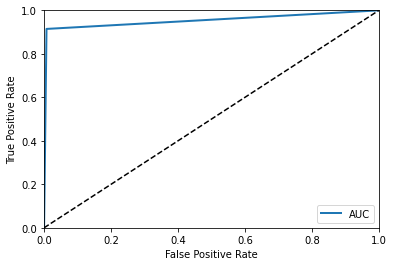

In [11]:
plt.plot(fpr, tpr, linewidth=2, label="AUC")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

In [ ]:
TP FP     TN FP
FN TN     FN TP

- __Guardamos__ el modelo<br>

In [14]:
model_file = MODELS_PATH + os.sep + 'logistic_regession.joblib'
dump(lr_model, model_file) 

['.\\modelos\\logistic_regession.joblib']

- __Cargamos__ el modelo<br>

In [18]:
model_file = MODELS_PATH + os.sep + 'logistic_regession.joblib'
lr_model = load(model_file) 

***
### __2.__ Árboles de decisión

- Importamos la librería necesaria para utilizar árboles de decisión:

In [19]:
from sklearn.tree import DecisionTreeClassifier

- Creamos el objeto _DecisionTreeClassifier_ :

In [20]:
dt_model= DecisionTreeClassifier()
print(dt_model)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


- Realizamos una __búsqueda exhaustiva__ de los __hiperparámetros__ del modelo. Para ello hacemos uso de la "__validación cruzada__":<br>

In [35]:
k_fold = KFold(n_splits=5, shuffle = True, random_state=150)

max_leaf_nodes = [50,100,500,1000]
max_depth = [5,10,20,30]

for mln in max_leaf_nodes:
    for md in max_depth:
        
        print("*****************************************************************")
        print("MAX_LEAF_NODE: " + str(mln) + ", MAX_DEPTH: " + str(md))
        
        dt_model= DecisionTreeClassifier(max_leaf_nodes = mln, max_depth = md)
        y_train_pred = cross_val_predict(dt_model, X_train, y_train, cv=k_fold)
        cm = confusion_matrix(y_train, y_train_pred)
        print(cm)
        tn, fp, fn, tp = cm.ravel()
        print("True Positives: " + str(tp))
        print("True Negatives: " + str(tn))
        print("False Positives: " + str(fp))
        print("False Negatives: " + str(fn))
        print(classification_report(y_train, y_train_pred))
        accuracy = accuracy_score(y_train, y_train_pred)
        print('Puntuación: ' + str(accuracy))
        f1 = f1_score(y_train, y_train_pred)
        print("F1_score: " + str(f1))
        precision = tp / (tp + fp)
        print("Precisión: " + str(precision))
        recall = tp / (tp + fn)
        print("Recall: " + str(recall))
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
        print("TPR: " + str(tpr))
        print("FPR: " + str(fpr))
        auc = roc_auc_score(y_train, y_train_pred)
        print("AUC: " + str(auc))
        #La siguiente linea para integrar en la memoria en Latex
        print(str(mln) + " & " + str(md) + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) +  " \\\\ \hline" )
        print("*****************************************************************")
        print("\n")

*****************************************************************
MAX_LEAF_NODE: 50, MAX_DEPTH: 5
[[241236    752]
 [ 21060 220929]]
True Positives: 220929
True Negatives: 241236
False Positives: 752
False Negatives: 21060
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    241988
           1       1.00      0.91      0.95    241989

    accuracy                           0.95    483977
   macro avg       0.96      0.95      0.95    483977
weighted avg       0.96      0.95      0.95    483977

Puntuación: 0.9549317426241329
F1_score: 0.9529579226605128
Precisión: 0.9966077381462553
Recall: 0.912971250759332
TPR: [0.         0.91297125 1.        ]
FPR: [0.         0.00310759 1.        ]
AUC: 0.9549318293236633
50 & 5 & 95.4932 & 95.2958 & 99.6608 & 91.2971 & 95.49318 \\ \hline
*****************************************************************


*****************************************************************
MAX_LEAF_NODE: 50, MAX_DEPTH

[[240429   1559]
 [ 17719 224270]]
True Positives: 224270
True Negatives: 240429
False Positives: 1559
False Negatives: 17719
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    241988
           1       0.99      0.93      0.96    241989

    accuracy                           0.96    483977
   macro avg       0.96      0.96      0.96    483977
weighted avg       0.96      0.96      0.96    483977

Puntuación: 0.9601675286222279
F1_score: 0.9587916668447987
Precisión: 0.9930965465019993
Recall: 0.9267776634475121
TPR: [0.         0.92677766 1.        ]
FPR: [0.         0.00644247 1.        ]
AUC: 0.9601675976129737
500 & 10 & 96.0168 & 95.8792 & 99.3097 & 92.6778 & 96.01676 \\ \hline
*****************************************************************


*****************************************************************
MAX_LEAF_NODE: 500, MAX_DEPTH: 20
[[239370   2618]
 [ 15521 226468]]
True Positives: 226468
True Negatives: 239370
False P

Obtenemos que los mejores parámetros para _DecisionTree_ en este problema de clasificación son __máxima profundidad 30__ y __máximos nodos hoja 1000__.<br>

#### Utilización de los __mejores parámetros__ con los datos de __test__<br>

- __Entrenamos__ el clasificador con los __datos__ de __entrenamiento__ y __predecimos__ con el conjunto de __datos__ de __test__:<br>

In [21]:
inicio = timeit.default_timer()

dt_model= DecisionTreeClassifier(max_depth = 30, max_leaf_nodes = 1000)
dt_model.fit(X_train, y_train)
y_test_pred = dt_model.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo) 

print("RESULTADOS ÁRBOL DECISIÓN")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print('Puntuación: ' + str(accuracy))
f1 = f1_score(y_test, y_test_pred)
print("F1_score: " + str(f1))
precision = tp / (tp + fp)
print("Precisión: " + str(precision))
recall = tp / (tp + fn)
print("Recall: " + str(recall))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
print("TPR: " + str(tpr))
print("FPR: " + str(fpr))
auc = roc_auc_score(y_test, y_test_pred)
print("AUC: " + str(auc))
#La siguiente linea para integrar en la memoria en Latex
print("Árbol Decisión" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) +  " \\\\ \hline" )


Tiempo de ejecución:  1.0731041999999604
RESULTADOS ÁRBOL DECISIÓN
[[98418  5292]
 [ 6108 97601]]
True Positives: 97601
True Negatives: 98418
False Positives: 5292
False Negatives: 6108
              precision    recall  f1-score   support

           0       0.94      0.95      0.95    103710
           1       0.95      0.94      0.94    103709

    accuracy                           0.95    207419
   macro avg       0.95      0.95      0.95    207419
weighted avg       0.95      0.95      0.95    207419

Puntuación: 0.9450387862249842
F1_score: 0.9448214441292921
Precisión: 0.9485679297911422
Recall: 0.9411044364519955
TPR: [0.         0.94110444 1.        ]
FPR: [0.        0.0510269 1.       ]
AUC: 0.9450387672569495
Árbol Decisión & 94.5039 & 94.4821 & 94.8568 & 94.1104 & 94.50388 & 1.0731 \\ \hline


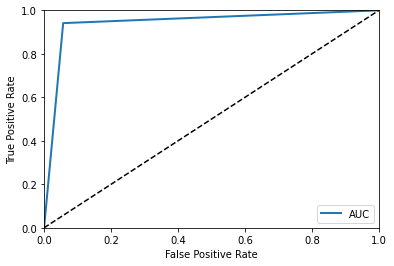

In [41]:
plt.plot(fpr, tpr, linewidth=2, label="AUC")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

- __Guardamos__ el modelo<br>

In [22]:
model_file = MODELS_PATH + os.sep + 'decision_tree.joblib'
dump(dt_model, model_file)

['.\\modelos\\decision_tree.joblib']

- __Cargamos__ el modelo<br>

In [23]:
model_file = MODELS_PATH + os.sep + 'decision_tree.joblib'
dt_model = load(model_file)

***
### __3.__ Random Forest

- Importamos la librería necesaria para utilizar Random Forest: <br>

In [24]:
from sklearn.ensemble import RandomForestClassifier

- Creamos el objeto _RandomForestClassifier_ :<br>

In [25]:
rf_model= RandomForestClassifier(n_estimators=100, oob_score=True)
print(rf_model)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)


- Realizamos una __búsqueda exhaustiva__ de los __hiperparámetros__ del modelo. Para ello hacemos uso de la "__validación cruzada__":<br>

In [44]:
k_fold = KFold(n_splits=5, shuffle = True, random_state=150)

n_estimators = [20,50,100,200]
max_depth = [5,10,15,20]

for ne in n_estimators:
    for md in max_depth:

        print("*****************************************************************")
        print("N_ESTIMATORS: " + str(ne) + ", MAX_DEPTH: " + str(md))
        
        rf_model= RandomForestClassifier(max_depth = md, n_estimators = ne)
        y_train_pred = cross_val_predict(rf_model, X_train, y_train, cv=k_fold)
        cm = confusion_matrix(y_train, y_train_pred)
        print(cm)
        tn, fp, fn, tp = cm.ravel()
        print("True Positives: " + str(tp))
        print("True Negatives: " + str(tn))
        print("False Positives: " + str(fp))
        print("False Negatives: " + str(fn))
        print(classification_report(y_train, y_train_pred))
        accuracy = accuracy_score(y_train, y_train_pred)
        print('Puntuación: ' + str(accuracy))
        f1 = f1_score(y_train, y_train_pred)
        print("F1_score: " + str(f1))
        precision = tp / (tp + fp)
        print("Precisión: " + str(precision))
        recall = tp / (tp + fn)
        print("Recall: " + str(recall))
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
        print("TPR: " + str(tpr))
        print("FPR: " + str(fpr))
        auc = roc_auc_score(y_train, y_train_pred)
        print("AUC: " + str(auc))
        #La siguiente linea para integrar en la memoria en Latex
        print(str(ne) + " & " + str(md) + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) +  " \\\\ \hline" )
        print("*****************************************************************")
        print("\n")

*****************************************************************
N_ESTIMATORS: 20, MAX_DEPTH: 5
[[241536    452]
 [ 21873 220116]]
True Positives: 220116
True Negatives: 241536
False Positives: 452
False Negatives: 21873
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    241988
           1       1.00      0.91      0.95    241989

    accuracy                           0.95    483977
   macro avg       0.96      0.95      0.95    483977
weighted avg       0.96      0.95      0.95    483977

Puntuación: 0.9538717748983939
F1_score: 0.9517356779813082
Precisión: 0.9979507453483732
Recall: 0.9096115939154259
TPR: [0.         0.90961159 1.        ]
FPR: [0.         0.00186786 1.        ]
AUC: 0.9538718663495837
20 & 5 & 95.3872 & 95.1736 & 99.7951 & 90.9612 & 95.38719 \\ \hline
*****************************************************************


*****************************************************************
N_ESTIMATORS: 20, MAX_DEPTH:

[[241315    673]
 [ 19624 222365]]
True Positives: 222365
True Negatives: 241315
False Positives: 673
False Negatives: 19624
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    241988
           1       1.00      0.92      0.96    241989

    accuracy                           0.96    483977
   macro avg       0.96      0.96      0.96    483977
weighted avg       0.96      0.96      0.96    483977

Puntuación: 0.9580620566679822
F1_score: 0.9563530719721651
Precisión: 0.9969825769599799
Recall: 0.9189054047911269
TPR: [0.        0.9189054 1.       ]
FPR: [0.         0.00278113 1.        ]
AUC: 0.9580621375741674
100 & 10 & 95.8062 & 95.6353 & 99.6983 & 91.8905 & 95.80621 \\ \hline
*****************************************************************


*****************************************************************
N_ESTIMATORS: 100, MAX_DEPTH: 15
[[240841   1147]
 [ 17312 224677]]
True Positives: 224677
True Negatives: 240841
False Positi

Obtenemos que los mejores parámetros para _RandomForest_ en este problema de clasificación son __número de árboles 100__ y __máxima profundidad 20__.<br>

#### Utilización de los __mejores parámetros__ con los datos de __test__<br>

- __Entrenamos__ el clasificador con los __datos__ de __entrenamiento__ y __predecimos__ con el conjunto de __datos__ de __test__:<br>

In [26]:
inicio = timeit.default_timer()

rf_model= RandomForestClassifier(max_depth = 20, n_estimators=100)
rf_model.fit(X_train, y_train)
y_test_pred = rf_model.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo) 

print("RESULTADOS RANDOM FOREST")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print('Puntuación: ' + str(accuracy))
f1 = f1_score(y_test, y_test_pred)
print("F1_score: " + str(f1))
precision = tp / (tp + fp)
print("Precisión: " + str(precision))
recall = tp / (tp + fn)
print("Recall: " + str(recall))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
print("TPR: " + str(tpr))
print("FPR: " + str(fpr))
auc = roc_auc_score(y_test, y_test_pred)
print("AUC: " + str(auc))
#La siguiente linea para integrar en la memoria en Latex
print("Random Forest" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) +  " \\\\ \hline" )


Tiempo de ejecución:  54.02824079999999
RESULTADOS RANDOM FOREST
[[101404   2306]
 [  6861  96848]]
True Positives: 96848
True Negatives: 101404
False Positives: 2306
False Negatives: 6861
              precision    recall  f1-score   support

           0       0.94      0.98      0.96    103710
           1       0.98      0.93      0.95    103709

    accuracy                           0.96    207419
   macro avg       0.96      0.96      0.96    207419
weighted avg       0.96      0.96      0.96    207419

Puntuación: 0.955804434502143
F1_score: 0.9548118681080336
Precisión: 0.9767432478770398
Recall: 0.9338437358377769
TPR: [0.         0.93384374 1.        ]
FPR: [0.         0.02223508 1.        ]
AUC: 0.9558043286266312
Random Forest & 95.5804 & 95.4812 & 97.6743 & 93.3844 & 95.58043 & 54.0282 \\ \hline


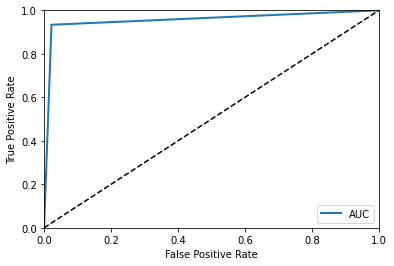

In [46]:
plt.plot(fpr, tpr, linewidth=2, label="AUC")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

- __Guardamos__ el modelo<br>

In [27]:
model_file = MODELS_PATH + os.sep + 'random_forest.joblib'
dump(rf_model, model_file)

['.\\modelos\\random_forest.joblib']

- __Cargamos__ el modelo<br>

In [28]:
model_file = MODELS_PATH + os.sep + 'random_forest.joblib'
rf_model = load(model_file)

***
### __4. K-Nearest Neighbors__<br>

- Importamos la librería necesaria para utilizar _K-Nearest Neighbors_:<br>

In [28]:
from sklearn.neighbors import KNeighborsClassifier

- Creamos el objeto _KNeighborsClassifier_ : <br>

In [29]:
knn_model = KNeighborsClassifier()
print(knn_model)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


- Realizamos una __búsqueda exhaustiva__ de los __hiperparámetros__ del modelo. Para ello hacemos uso de la "__validación cruzada__":<br>

In [10]:
k_fold = KFold(n_splits=5, shuffle = True, random_state=150)

p = [1,2]
n_neighbors = [10,25,50,100]

for e in p:
    for nn in n_neighbors:
        
        print("*****************************************************************")
        print("P: " + str(e) + ", N_NEIGHBOURS: " + str(nn))
        
        knn_model= KNeighborsClassifier(p = e, n_neighbors = nn)
        y_train_pred = cross_val_predict(knn_model, X_train, y_train, cv=k_fold)
        cm = confusion_matrix(y_train, y_train_pred)
        print(cm)
        tn, fp, fn, tp = cm.ravel()
        print("True Positives: " + str(tp))
        print("True Negatives: " + str(tn))
        print("False Positives: " + str(fp))
        print("False Negatives: " + str(fn))
        print(classification_report(y_train, y_train_pred))
        accuracy = accuracy_score(y_train, y_train_pred)
        print('Puntuación: ' + str(accuracy))
        f1 = f1_score(y_train, y_train_pred)
        print("F1_score: " + str(f1))
        precision = tp / (tp + fp)
        print("Precisión: " + str(precision))
        recall = tp / (tp + fn)
        print("Recall: " + str(recall))
        fpr, tpr, thresholds = roc_curve(y_train, y_train_pred)
        print("TPR: " + str(tpr))
        print("FPR: " + str(fpr))
        auc = roc_auc_score(y_train, y_train_pred)
        print("AUC: " + str(auc))
        #La siguiente linea para integrar en la memoria en Latex
        print(str(e) + " & " + str(nn) + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) +  " \\\\ \hline" )
        print("*****************************************************************")
        print("\n")

*****************************************************************
P: 1, N_NEIGHBOURS: 10
[[239046   2942]
 [ 15737 226252]]
True Positives: 226252
True Negatives: 239046
False Positives: 2942
False Negatives: 15737
              precision    recall  f1-score   support

           0       0.94      0.99      0.96    241988
           1       0.99      0.93      0.96    241989

    accuracy                           0.96    483977
   macro avg       0.96      0.96      0.96    483977
weighted avg       0.96      0.96      0.96    483977

Puntuación: 0.9614051907425353
F1_score: 0.9603572285078197
Precisión: 0.9871637128371598
Recall: 0.9349681183855465
TPR: [0.         0.93496812 1.        ]
FPR: [0.         0.01215763 1.        ]
AUC: 0.9614052453672943
1 & 10 & 96.1405 & 96.0357 & 98.7164 & 93.4968 & 96.14052 \\ \hline
*****************************************************************


*****************************************************************
P: 1, N_NEIGHBOURS: 25
[[239445   2

Obtenemos que los mejores parámetros para _KNeighborsClassifier_ en este problema de clasificación son utilizar __distancia de Manhattan (p = 1)__ y __número de vecinos__ igual a __10__.<br>

#### Utilización de los __mejores parámetros__ con los datos de __test__<br>

- __Entrenamos__ el clasificador con los __datos__ de __entrenamiento__ y __predecimos__ con el conjunto de __datos__ de __test__:<br>

In [43]:
inicio = timeit.default_timer()

knn_model = KNeighborsClassifier(n_neighbors=10, p=1)
knn_model.fit(X_train, y_train)
y_test_pred = knn_model.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo) 

print("RESULTADOS K-Nearest Neighbors")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print('Puntuación: ' + str(accuracy))
f1 = f1_score(y_test, y_test_pred)
print("F1_score: " + str(f1))
precision = tp / (tp + fp)
print("Precisión: " + str(precision))
recall = tp / (tp + fn)
print("Recall: " + str(recall))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
print("TPR: " + str(tpr))
print("FPR: " + str(fpr))
auc = roc_auc_score(y_test, y_test_pred)
print("AUC: " + str(auc))
#La siguiente linea para integrar en la memoria en Latex
print("K-Nearest Neighbors" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) +  " \\\\ \hline" )


Tiempo de ejecución:  682.8254219999999
RESULTADOS K-Nearest Neighbors
[[96691  7019]
 [ 6466 97243]]
True Positives: 97243
True Negatives: 96691
False Positives: 7019
False Negatives: 6466
              precision    recall  f1-score   support

           0       0.94      0.93      0.93    103710
           1       0.93      0.94      0.94    103709

    accuracy                           0.93    207419
   macro avg       0.93      0.93      0.93    207419
weighted avg       0.93      0.93      0.93    207419

Puntuación: 0.93498666949508
F1_score: 0.9351592289309567
Precisión: 0.9326792119851911
Recall: 0.9376524698917162
TPR: [0.         0.93765247 1.        ]
FPR: [0.         0.06767911 1.        ]
AUC: 0.9349866823472659
K-Nearest Neighbors & 93.4987 & 93.5159 & 93.2679 & 93.7652 & 93.49867 & 682.8254 \\ \hline


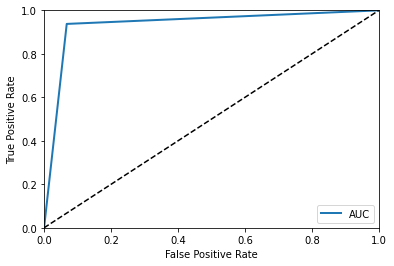

In [44]:
plt.plot(fpr, tpr, linewidth=2, label="AUC")
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

Debido a los resultados obtenidos y al tiempo de ejecución en este caso no guardamos el modelo. <br>

***
### Voting
Vamos a realizar un ensamblade de tipo _soft voting_ o voto suave.
Previamente necesitamos importar la librería _VotingClassifier_ e indicar los modelos implicados:<br>

In [29]:
from sklearn.ensemble import VotingClassifier

models = [
    ('Regresión Logística', lr_model), 
    ('Árbol de Decisión', dt_model), 
    ('Random Forest', rf_model)
]

- Soft Voting

In [30]:
inicio = timeit.default_timer()

soft_voting_clf = VotingClassifier(estimators=models, voting='soft')
soft_voting_clf.fit(X_train, y_train)
y_test_pred = soft_voting_clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo) 

print("RESULTADOS SOFT VOTING")
cm = confusion_matrix(y_test, y_test_pred)
print(cm)
tn, fp, fn, tp = cm.ravel()
print("True Positives: " + str(tp))
print("True Negatives: " + str(tn))
print("False Positives: " + str(fp))
print("False Negatives: " + str(fn))
print(classification_report(y_test, y_test_pred))
accuracy = accuracy_score(y_test, y_test_pred)
print('Puntuación: ' + str(accuracy))
f1 = f1_score(y_test, y_test_pred)
print("F1_score: " + str(f1))
precision = tp / (tp + fp)
print("Precisión: " + str(precision))
recall = tp / (tp + fn)
print("Recall: " + str(recall))
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred)
print("TPR: " + str(tpr))
print("FPR: " + str(fpr))
auc = roc_auc_score(y_test, y_test_pred)
print("AUC: " + str(auc))
#La siguiente linea para integrar en la memoria en Latex
print(str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) +  " & " + str(round(tiempo,4)) +  " \\\\ \hline" )
  

Tiempo de ejecución:  63.124406499999964
RESULTADOS SOFT VOTING
[[102393   1317]
 [  8103  95606]]
True Positives: 95606
True Negatives: 102393
False Positives: 1317
False Negatives: 8103
              precision    recall  f1-score   support

           0       0.93      0.99      0.96    103710
           1       0.99      0.92      0.95    103709

    accuracy                           0.95    207419
   macro avg       0.96      0.95      0.95    207419
weighted avg       0.96      0.95      0.95    207419

Puntuación: 0.9545846812490659
F1_score: 0.9530483671597753
Precisión: 0.9864118939776937
Recall: 0.9218679188884282
TPR: [0.         0.92186792 1.        ]
FPR: [0.         0.01269887 1.        ]
AUC: 0.9545845235171098
95.4585 & 95.3048 & 98.6412 & 92.1868 & 95.45845 & 63.1244 \\ \hline


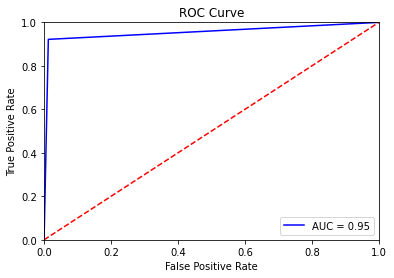

In [31]:
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

- __Guardamos__ el modelo<br>

In [32]:
model_file = MODELS_PATH + os.sep + 'soft_voting_1.joblib'
dump(soft_voting_clf, model_file)

['.\\modelos\\soft_voting_1.joblib']

- __Cargamos__ el modelo<br>

In [33]:
model_file = MODELS_PATH + os.sep + 'soft_voting_1.joblib'
soft_voting_clf = load(model_file)

***
## Aplicación de aprendizaje automático sobre método 2 extracción características<br>

En el apartado anterior de selección de características aplicamos el aprendizaje automático para comprobar qué número de características era óptima en cada caso. En este apartado vamos a realizar la combinación de los clasificadores en uno sólo. <br>

- Cargamos los datos obtenidos tras separar cada URL en sus respectivas partes: <br>

In [73]:
from sklearn.feature_extraction.text import CountVectorizer

SUBFOLDER_METHOD_2 = "4_extraccion_caracteristicas" + os.sep + "metodo_2"

df_train = load_data("4_2_parts_train.csv",',', SUBFOLDER_METHOD_2)
df_test = load_data("4_2_parts_test.csv",',', SUBFOLDER_METHOD_2)

#Sustituimos valores NaN por cadena vacía ''
df_train['protocolo'] = df_train['protocolo'].fillna('')
df_train['subdominio'] = df_train['subdominio'].fillna('')
df_train['dominio'] = df_train['dominio'].fillna('')
df_train['tld'] = df_train['tld'].fillna('')
df_train['path'] = df_train['path'].fillna('')
df_train['query'] = df_train['query'].fillna('')
df_test['protocolo'] = df_test['protocolo'].fillna('')
df_test['subdominio'] = df_test['subdominio'].fillna('')
df_test['dominio'] = df_test['dominio'].fillna('')
df_test['tld'] = df_test['tld'].fillna('')
df_test['path'] = df_test['path'].fillna('')
df_test['query'] = df_test['query'].fillna('')

print(len(df_train))
df_train.head()

483977


,protocolo,subdominio,dominio,tld,path,query,label
0,https,www.athletics,mta,ca,/varsity/football/cfl.html,,0
1,https,drive,google,com,/file/d/1uis0mbfzg1vrxxg2ka2l18q9pdyrmqv8,,1
2,http,,xmotor,ir,/localization/closed_section/verified_area/752...,,1
3,https,www.en,wikipedia,org,/wiki/papineau_(montreal_metro),,0
4,https,www.eddiecibrian-actor,blogspot,com,/,,0


In [74]:
def metrics(y, y_pred):
    cm = confusion_matrix(y, y_pred)
    print(cm)
    tn, fp, fn, tp = cm.ravel()
    print("True Positives: " + str(tp))
    print("True Negatives: " + str(tn))
    print("False Positives: " + str(fp))
    print("False Negatives: " + str(fn))
    print(classification_report(y, y_pred))
    accuracy = accuracy_score(y, y_pred)
    print('Puntuación: ' + str(accuracy))
    f1 = f1_score(y, y_pred)
    print("F1_score: " + str(f1))
    precision = tp / (tp + fp)
    print("Precisión: " + str(precision))
    recall = tp / (tp + fn)
    print("Recall: " + str(recall))
    fpr, tpr, thresholds = roc_curve(y, y_pred)
    print("TPR: " + str(tpr))
    print("FPR: " + str(fpr))
    auc = roc_auc_score(y, y_pred)
    print("AUC: " + str(auc))
    
    return accuracy, f1, precision, recall, auc

#### Protocolo: <br>

In [75]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,1), min_df=200, token_pattern=r'[a-zA-Z]{2,}', max_features=2,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['protocolo']
y_train = df_train['label']

X_test = df_test['protocolo']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_1 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_1)

#La siguiente linea para integrar en la memoria en Latex
print("Protocolo" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  3.4232787000000826
[[103709      1]
 [ 12108  91601]]
True Positives: 91601
True Negatives: 103709
False Positives: 1
False Negatives: 12108
              precision    recall  f1-score   support

           0       0.90      1.00      0.94    103710
           1       1.00      0.88      0.94    103709

    accuracy                           0.94    207419
   macro avg       0.95      0.94      0.94    207419
weighted avg       0.95      0.94      0.94    207419

Puntuación: 0.9416205844209065
F1_score: 0.9380014438510887
Precisión: 0.9999890832077902
Recall: 0.8832502482908908
TPR: [0.         0.88325025 1.        ]
FPR: [0.00000000e+00 9.64227172e-06 1.00000000e+00]
AUC: 0.9416203030095859
Protocolo & 94.1621 & 93.8001 & 99.9989 & 88.325 & 94.16203 & 3.4233 \\ \hline
*****************************************************************




- __Guardamos__ el modelo<br>

In [76]:
model_file = MODELS_PATH + os.sep + 'count_vect_2_1.joblib'
dump(clf, model_file)

['.\\modelos\\count_vect_2_1.joblib']

#### Subdominio: <br>

In [77]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,2), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=500,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['subdominio']
y_train = df_train['label']

X_test = df_test['subdominio']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_2 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_2)

#La siguiente linea para integrar en la memoria en Latex
print("Subdominio" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  7.885582599999907
[[103489    221]
 [  9369  94340]]
True Positives: 94340
True Negatives: 103489
False Positives: 221
False Negatives: 9369
              precision    recall  f1-score   support

           0       0.92      1.00      0.96    103710
           1       1.00      0.91      0.95    103709

    accuracy                           0.95    207419
   macro avg       0.96      0.95      0.95    207419
weighted avg       0.96      0.95      0.95    207419

Puntuación: 0.9537650842015437
F1_score: 0.9516316134563979
Precisión: 0.9976628842757586
Recall: 0.9096606851864352
TPR: [0.         0.90966069 1.        ]
FPR: [0.         0.00213094 1.        ]
AUC: 0.9537648715682441
Subdominio & 95.3765 & 95.1632 & 99.7663 & 90.9661 & 95.37649 & 7.8856 \\ \hline
*****************************************************************




- __Guardamos__ el modelo<br>

In [78]:
model_file = MODELS_PATH + os.sep + 'count_vect_2_2.joblib'
dump(clf, model_file)

['.\\modelos\\count_vect_2_2.joblib']

#### Dominio: <br>

In [84]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,2), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=500,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['dominio']
y_train = df_train['label']

X_test = df_test['dominio']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_3 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_3)

#La siguiente linea para integrar en la memoria en Latex
print("Dominio" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  11.307541199999832
[[ 49531  54179]
 [   500 103209]]
True Positives: 103209
True Negatives: 49531
False Positives: 54179
False Negatives: 500
              precision    recall  f1-score   support

           0       0.99      0.48      0.64    103710
           1       0.66      1.00      0.79    103709

    accuracy                           0.74    207419
   macro avg       0.82      0.74      0.72    207419
weighted avg       0.82      0.74      0.72    207419

Puntuación: 0.7363838414031502
F1_score: 0.7905797462245832
Precisión: 0.6557615574249626
Recall: 0.9951788176532412
TPR: [0.         0.99517882 1.        ]
FPR: [0.         0.52240864 1.        ]
AUC: 0.7363850890888903
Dominio & 73.6384 & 79.058 & 65.5762 & 99.5179 & 73.63851 & 11.3075 \\ \hline
*****************************************************************




#### TLD: <br>

In [85]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,1), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=100,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['tld']
y_train = df_train['label']

X_test = df_test['tld']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_4 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_4)

#La siguiente linea para integrar en la memoria en Latex
print("TLD" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  13.420613399999638
[[101456   2254]
 [ 45424  58285]]
True Positives: 58285
True Negatives: 101456
False Positives: 2254
False Negatives: 45424
              precision    recall  f1-score   support

           0       0.69      0.98      0.81    103710
           1       0.96      0.56      0.71    103709

    accuracy                           0.77    207419
   macro avg       0.83      0.77      0.76    207419
weighted avg       0.83      0.77      0.76    207419

Puntuación: 0.7701367762837541
F1_score: 0.709719448638644
Precisión: 0.9627678025735477
Recall: 0.5620052261616639
TPR: [0.         0.56200523 1.        ]
FPR: [0.         0.02173368 1.        ]
AUC: 0.7701357728532743
TLD & 77.0137 & 70.9719 & 96.2768 & 56.2005 & 77.01358 & 13.4206 \\ \hline
*****************************************************************




#### Path: <br>

In [79]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,3), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=1000,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['path']
y_train = df_train['label']

X_test = df_test['path']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_5 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_5)

#La siguiente linea para integrar en la memoria en Latex
print("Path" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  24.802696899999773
[[100466   3244]
 [ 15769  87940]]
True Positives: 87940
True Negatives: 100466
False Positives: 3244
False Negatives: 15769
              precision    recall  f1-score   support

           0       0.86      0.97      0.91    103710
           1       0.96      0.85      0.90    103709

    accuracy                           0.91    207419
   macro avg       0.91      0.91      0.91    207419
weighted avg       0.91      0.91      0.91    207419

Puntuación: 0.9083353019733004
F1_score: 0.9024439051171669
Precisión: 0.9644235830847517
Recall: 0.8479495511479235
TPR: [0.         0.84794955 1.        ]
FPR: [0.         0.03127953 1.        ]
AUC: 0.9083350108453918
Path & 90.8335 & 90.2444 & 96.4424 & 84.795 & 90.8335 & 24.8027 \\ \hline
*****************************************************************




- __Guardamos__ el modelo<br>

In [80]:
model_file = MODELS_PATH + os.sep + 'count_vect_2_3.joblib'
dump(clf, model_file)

['.\\modelos\\count_vect_2_3.joblib']

#### Query: <br>

In [87]:
clf = Pipeline(
    [('c_vect',CountVectorizer(ngram_range=(1,3), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=500,binary=True)),
    ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
    ]
)

X_train = df_train['query']
y_train = df_train['label']

X_test = df_test['query']
y_test = df_test['label']

inicio = timeit.default_timer()

clf.fit(X_train, y_train)
y_test_pred_6 = clf.predict(X_test)

fin = timeit.default_timer()
tiempo = fin - inicio
print("Tiempo de ejecución: ", tiempo)

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred_6)

#La siguiente linea para integrar en la memoria en Latex
print("Query" + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " & " + str(round(tiempo,4)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

Tiempo de ejecución:  6.991912499999671
[[103314    396]
 [ 95014   8695]]
True Positives: 8695
True Negatives: 103314
False Positives: 396
False Negatives: 95014
              precision    recall  f1-score   support

           0       0.52      1.00      0.68    103710
           1       0.96      0.08      0.15    103709

    accuracy                           0.54    207419
   macro avg       0.74      0.54      0.42    207419
weighted avg       0.74      0.54      0.42    207419

Puntuación: 0.5400132099759424
F1_score: 0.1541666666666667
Precisión: 0.9564404355956441
Recall: 0.08384036101013413
TPR: [0.         0.08384036 1.        ]
FPR: [0.         0.00381834 1.        ]
AUC: 0.5400110107046621
Query & 54.0013 & 15.4167 & 95.644 & 8.384 & 54.0011 & 6.9919 \\ \hline
*****************************************************************




***
### Combinación de los tres mejores clasificadores: <br>

- Si combinamos los seis modelos anteriores mediante _Hard Voting_ obtenemos un nuevo modelo con los siguientes resultados: <br>

In [90]:
columns = [
    'resultado_protocolo',
    'resultado_subdominio',
    'resultado_path'
]
df_result = pd.DataFrame(columns=columns)

df_result['resultado_protocolo'] = y_test_pred_1.tolist()
df_result['resultado_subdominio'] = y_test_pred_2.tolist()
df_result['resultado_path'] = y_test_pred_5.tolist()

In [91]:
voting = []

for index, row in df_result.iterrows():
    result = row['resultado_protocolo'] + row['resultado_subdominio'] + row['resultado_path']
    
    if result >= 2:
        voting.append(1)
    else:
        voting.append(0)

df_result['voting'] = voting

In [98]:
y_test = df_test['label']
y_test_pred = df_result['voting']

print("RESULTADOS VOTING")

accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred)

#La siguiente linea para integrar en la memoria en Latex
print(str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " \\\\ \hline" )
print("*****************************************************************")
print("\n")

RESULTADOS VOTING
[[103703      7]
 [  4169  99540]]
True Positives: 99540
True Negatives: 103703
False Positives: 7
False Negatives: 4169
              precision    recall  f1-score   support

           0       0.96      1.00      0.98    103710
           1       1.00      0.96      0.98    103709

    accuracy                           0.98    207419
   macro avg       0.98      0.98      0.98    207419
weighted avg       0.98      0.98      0.98    207419

Puntuación: 0.9798668395855732
F1_score: 0.97945448104853
Precisión: 0.9999296814570002
Recall: 0.9598009815927258
TPR: [0.         0.95980098 1.        ]
FPR: [0.0000000e+00 6.7495902e-05 1.0000000e+00]
AUC: 0.9798667428453457
97.9867 & 97.9454 & 99.993 & 95.9801 & 97.98667 \\ \hline
*****************************************************************




***
## Aplicación de aprendizaje automático sobre la combinación de ambas técnicas<br>

En este apartado vamos a realizar la combinación de los clasificadores obtenidos por ambas técnicas en uno sólo. <br>

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import VotingClassifier

In [119]:
####Datos técnica 1
#Datos entrenamiento
df_train_1 = load_data("6_train_dataset.csv",',', "6_preprocesado_datos")
#Datos prueba
df_test_1 = load_data("6_test_dataset.csv",',', "6_preprocesado_datos")

####Datos técnica 2
SUBFOLDER_METHOD_2 = "4_extraccion_caracteristicas" + os.sep + "metodo_2"
#Datos entrenamiento
df_train_2 = load_data("4_2_parts_train.csv",',', SUBFOLDER_METHOD_2)
#Datos prueba
df_test_2 = load_data("4_2_parts_test.csv",',', SUBFOLDER_METHOD_2)

#Sustituimos valores NaN por cadena vacía ''
df_train_2['protocolo'] = df_train_2['protocolo'].fillna('')
df_train_2['subdominio'] = df_train_2['subdominio'].fillna('')
df_train_2['dominio'] = df_train_2['dominio'].fillna('')
df_train_2['tld'] = df_train_2['tld'].fillna('')
df_train_2['path'] = df_train_2['path'].fillna('')
df_train_2['query'] = df_train_2['query'].fillna('')
df_test_2['protocolo'] = df_test_2['protocolo'].fillna('')
df_test_2['subdominio'] = df_test_2['subdominio'].fillna('')
df_test_2['dominio'] = df_test_2['dominio'].fillna('')
df_test_2['tld'] = df_test_2['tld'].fillna('')
df_test_2['path'] = df_test_2['path'].fillna('')
df_test_2['query'] = df_test_2['query'].fillna('')

In [146]:
umbrales = [1,2,3,4]
for i in  umbrales:
    print("######################################################")
    print("UMBRAL " + str(i) + ": ")
    inicio = timeit.default_timer()

    y_train = np.array(df_train_1.label)
    y_test = np.array(df_test_1.label)

    #####Técnica 1
    X_train_1 = np.array(df_train_1.drop('label', 1))
    X_test_1 = np.array(df_test_1.drop('label', 1))
    lr_model = LogisticRegression(solver = 'lbfgs', max_iter=2000, C=1)
    dt_model= DecisionTreeClassifier(max_depth = 30, max_leaf_nodes = 1000)
    rf_model= RandomForestClassifier(max_depth = 20, n_estimators=100)
    models_1 = [
        ('Regresión Logística', lr_model), 
        ('Árbol de Decisión', dt_model), 
        ('Random Forest', rf_model)
    ]
    voting_1 = VotingClassifier(estimators=models_1, voting='soft')
    voting_1.fit(X_train_1, y_train)
    y_test_pred_1 = voting_1.predict(X_test_1)


    #####Técnica 2

    #Protocolo
    clf_2_1 = Pipeline(
        [('c_vect',CountVectorizer(ngram_range=(1,1), min_df=200, token_pattern=r'[a-zA-Z]{2,}', max_features=2,binary=True)),
        ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
        ]
    )
    X_train_2_1 = df_train_2['protocolo']
    X_test_2_1 = df_test_2['protocolo']
    clf_2_1.fit(X_train_2_1, y_train)
    y_test_pred_2_1 = clf_2_1.predict(X_test_2_1)

    #Subdominio
    clf_2_2 = Pipeline(
        [('c_vect',CountVectorizer(ngram_range=(1,2), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=500,binary=True)),
        ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
        ]
    )
    X_train_2_2 = df_train_2['subdominio']
    X_test_2_2 = df_test_2['subdominio']
    clf_2_2.fit(X_train_2_2, y_train)
    y_test_pred_2_2 = clf_2_2.predict(X_test_2_2)

    #Path
    clf_2_3 = Pipeline(
        [('c_vect',CountVectorizer(ngram_range=(1,3), min_df=50, token_pattern=r'[a-zA-Z]{2,}', max_features=1000,binary=True)),
        ('lr', LogisticRegression(solver = 'lbfgs', max_iter=2000))
        ]
    )
    X_train_2_3 = df_train_2['path']
    X_test_2_3 = df_test_2['path']
    clf_2_3.fit(X_train_2_3, y_train)
    y_test_pred_2_3 = clf_2_3.predict(X_test_2_3)



    ######Combinacion

    columns = [
        'resultado_tecnica_1',
        'resultado_protocolo',
        'resultado_subdominio',
        'resultado_path'
    ]
    df_result = pd.DataFrame(columns=columns)
    df_result['resultado_tecnica_1'] = y_test_pred_1.tolist()
    df_result['resultado_protocolo'] = y_test_pred_2_1.tolist()
    df_result['resultado_subdominio'] = y_test_pred_2_2.tolist()
    df_result['resultado_path'] = y_test_pred_2_3.tolist()

    voting = []
    for index, row in df_result.iterrows():
        result = row['resultado_tecnica_1'] + row['resultado_protocolo'] + row['resultado_subdominio'] + row['resultado_path']
        if result >= i:
            voting.append(1)
        else:
            voting.append(0)

    df_result['voting'] = voting
    y_test = df_test['label']
    y_test_pred = df_result['voting']


    fin = timeit.default_timer()
    tiempo = fin - inicio
    print("Tiempo de ejecución: ", tiempo)

    print("RESULTADOS VOTING")
    accuracy, f1, precision, recall, auc = metrics(y_test, y_test_pred)

    #La siguiente linea para integrar en la memoria en Latex
    print(str(i) + " & " + str(round(accuracy*100,4)) +  " & " + str(round(f1*100,4)) +  " & " + str(round(precision*100,4)) +  " & " + str(round(recall*100,4))  +  " & " + str(round(auc*100,5)) + " \\\\ \hline" )
    print("*****************************************************************")
    print("\n")


######################################################
UMBRAL 1: 
Tiempo de ejecución:  154.6388412999986
RESULTADOS VOTING
[[ 99174   4536]
 [   153 103556]]
True Positives: 103556
True Negatives: 99174
False Positives: 4536
False Negatives: 153
              precision    recall  f1-score   support

           0       1.00      0.96      0.98    103710
           1       0.96      1.00      0.98    103709

    accuracy                           0.98    207419
   macro avg       0.98      0.98      0.98    207419
weighted avg       0.98      0.98      0.98    207419

Puntuación: 0.9773935849656975
F1_score: 0.9778612943281665
Precisión: 0.9580357473263517
Recall: 0.9985247182018918
TPR: [0.         0.99852472 1.        ]
FPR: [0.         0.04373734 1.        ]
AUC: 0.9773936868417618
1 & 97.7394 & 97.7861 & 95.8036 & 99.8525 & 97.73937 \\ \hline
*****************************************************************


######################################################
UMBRAL 2: 
Tiempo d